# EDA(Exploratory Data Anaysis) 탐색적 데이터 분석

- 탐색적 자료 분석
- 데이터 분석 이전에 그래프나 통계적인 분석을 통해서 데이터를 직관적으로 이해
- 데이터 자체가 가지고 있는 그대로의 의미를 파악
- 목적
 - 데이터 수집 의사 결정
 - 데이터 맞는 모델 선정
 - 변수들 간 관계 파악

- 순서
 - 데이터 가져오기(모듈 세팅)
 - 데이터 정보 확인
 - 데이터 전처리
  - 결측치
  - 이상치
 - 데이터 시각화

## 1. 데이터 가져오기 (모듈 세팅)

In [1]:
import pandas as pd

In [2]:
out_df = pd.read_excel('outlier.xlsx')

In [3]:
out_df

,번호,국어,수학,영어
0,1,32,80,100
1,2,50,100,90
2,3,810,100,78
3,4,80,120,21
4,5,88,67,29
5,6,70,50,69
6,7,68,24,34
7,8,90,97,39
8,9,-57,48,67
9,10,100,87,93


## 2. 데이터 정보 확인

In [4]:
out_df.head()

,번호,국어,수학,영어
0,1,32,80,100
1,2,50,100,90
2,3,810,100,78
3,4,80,120,21
4,5,88,67,29


In [5]:
out_df.tail()

,번호,국어,수학,영어
5,6,70,50,69
6,7,68,24,34
7,8,90,97,39
8,9,-57,48,67
9,10,100,87,93


In [6]:
out_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   번호      10 non-null     int64
 1   국어      10 non-null     int64
 2   수학      10 non-null     int64
 3   영어      10 non-null     int64
dtypes: int64(4)
memory usage: 448.0 bytes


In [7]:
out_df.describe()

,번호,국어,수학,영어
count,10.00000,10.000000,10.000000,10.00000
mean,5.50000,133.100000,77.300000,62.00000
std,3.02765,242.093852,29.616249,29.06315
min,1.00000,-57.000000,24.000000,21.00000
25%,3.25000,54.500000,54.250000,35.25000
50%,5.50000,75.000000,83.500000,68.00000
75%,7.75000,89.500000,99.250000,87.00000
max,10.00000,810.000000,120.000000,100.00000


In [8]:
out_df = out_df.set_index('번호')

In [9]:
out_df

,국어,수학,영어
번호,,,
1,32,80,100
2,50,100,90
3,810,100,78
4,80,120,21
5,88,67,29
6,70,50,69
7,68,24,34
8,90,97,39
9,-57,48,67


In [10]:
out_df['국어'] = out_df['국어'].replace(-57, 57)

In [11]:
out_df # 범주를 알고 있음 (0~100)

,국어,수학,영어
번호,,,
1,32,80,100
2,50,100,90
3,810,100,78
4,80,120,21
5,88,67,29
6,70,50,69
7,68,24,34
8,90,97,39
9,57,48,67


### 이상치 확인하기

- 이상치(outlier): 사분위에서 특정 범위(+-IQR * 1.5)를 초과하는 경우

In [12]:
import matplotlib.pyplot as plt

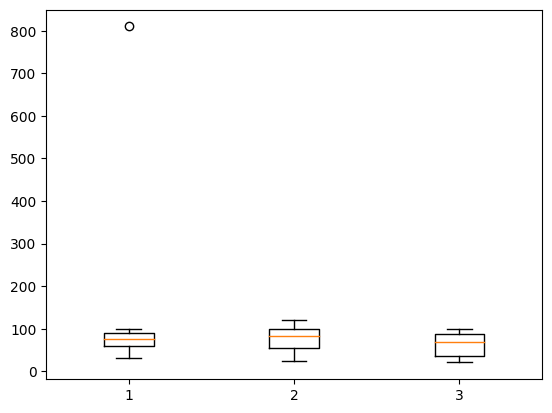

In [13]:
# 이상치 확인 -> boxplot

plt.boxplot(out_df)
plt.show()

In [115]:
out_df.mean()
out_df.max()
out_df.min()
q1 = out_df.quantile(0.25)
q2 = out_df.quantile(0.5)
q3 = out_df.quantile(0.75)

In [120]:
q2

국어    75.0
수학    83.5
영어    68.0
Name: 0.5, dtype: float64

In [121]:
out_df.describe()

,국어,수학,영어
count,10.000000,10.000000,10.00000
mean,71.600000,77.300000,62.00000
std,20.646226,29.616249,29.06315
min,32.000000,24.000000,21.00000
25%,59.750000,54.250000,35.25000
50%,75.000000,83.500000,68.00000
75%,86.250000,99.250000,87.00000
max,100.000000,120.000000,100.00000


In [118]:
IQR = q3 - q1

In [119]:
IQR

국어    26.50
수학    45.00
영어    51.75
dtype: float64

In [14]:
out_df['국어'] = out_df['국어'].replace(810, 81)
out_df

,국어,수학,영어
번호,,,
1,32,80,100
2,50,100,90
3,81,100,78
4,80,120,21
5,88,67,29
6,70,50,69
7,68,24,34
8,90,97,39
9,57,48,67


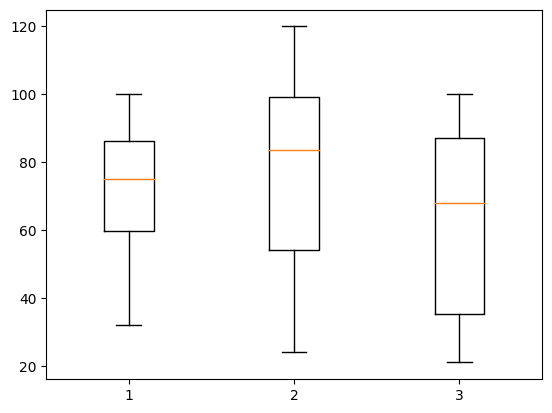

In [15]:
plt.boxplot(out_df)
plt.show()

## 1. 데이터 불러오기

In [16]:
weather_df = pd.read_csv('weather.csv', encoding='cp949')

In [17]:
weather_df.head()

,일시,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
0,2010.1.1,-1.7,5.0,0.0,13.3,3.4,334.7
1,2010.1.2,-0.4,13.2,0.0,17.0,5.1,14.1
2,2010.1.3,-0.1,7.5,0.0,14.5,5.4,5.5
3,2010.1.4,1.0,11.5,1.0,22.4,5.2,340.2
4,2010.1.5,-2.1,1.7,0.0,19.1,7.1,11.3


In [18]:
weather_df.tail()

,일시,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
360,2010.12.27,-0.1,6.7,0.0,20.3,3.8,284.1
361,2010.12.28,1.0,8.8,0.0,15.5,5.2,227.8
362,2010.12.29,-0.5,5.9,0.5,19.1,4.4,323.3
363,2010.12.30,-4.4,5.1,5.5,18.8,5.8,278.3
364,2010.12.31,-4.4,-1.0,15.0,19.2,6.3,284.1


## 2. 데이터 정보 확인

In [19]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   일시                 365 non-null    object 
 1   최저기온(°C)           359 non-null    float64
 2   최고기온(°C)           359 non-null    float64
 3   일강수량(mm)           359 non-null    float64
 4   최대 순간 풍속(m/s)      359 non-null    float64
 5   평균 풍속(m/s)         357 non-null    float64
 6   최대 순간 풍속 풍향(hhmi)  359 non-null    float64
dtypes: float64(6), object(1)
memory usage: 20.1+ KB


In [20]:
weather_df.describe()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,359.000000,359.000000,359.000000,359.000000,357.000000,359.000000
mean,10.023677,17.618384,8.679666,12.179944,4.378151,186.905571
std,8.804447,8.415890,22.873447,5.276340,1.627493,119.173462
min,-5.300000,-1.400000,0.000000,4.300000,1.400000,0.000000
25%,1.950000,11.400000,0.000000,7.950000,3.200000,61.900000
50%,9.500000,17.500000,0.000000,11.000000,4.100000,202.500000
75%,17.200000,25.000000,4.250000,14.950000,5.400000,320.600000
max,25.700000,34.000000,166.500000,32.900000,10.000000,357.200000


In [21]:
weather_df = weather_df.set_index('일시')
weather_df

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010.1.1,-1.7,5.0,0.0,13.3,3.4,334.7
2010.1.2,-0.4,13.2,0.0,17.0,5.1,14.1
2010.1.3,-0.1,7.5,0.0,14.5,5.4,5.5
2010.1.4,1.0,11.5,1.0,22.4,5.2,340.2
2010.1.5,-2.1,1.7,0.0,19.1,7.1,11.3
...,...,...,...,...,...,...
2010.12.27,-0.1,6.7,0.0,20.3,3.8,284.1
2010.12.28,1.0,8.8,0.0,15.5,5.2,227.8
2010.12.29,-0.5,5.9,0.5,19.1,4.4,323.3


In [22]:
# pd.to_datetime
weather_df.index = pd.to_datetime(weather_df.index, format='%Y-%m-%d')
weather_df

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-01-01,-1.7,5.0,0.0,13.3,3.4,334.7
2010-01-02,-0.4,13.2,0.0,17.0,5.1,14.1
2010-01-03,-0.1,7.5,0.0,14.5,5.4,5.5
2010-01-04,1.0,11.5,1.0,22.4,5.2,340.2
2010-01-05,-2.1,1.7,0.0,19.1,7.1,11.3
...,...,...,...,...,...,...
2010-12-27,-0.1,6.7,0.0,20.3,3.8,284.1
2010-12-28,1.0,8.8,0.0,15.5,5.2,227.8
2010-12-29,-0.5,5.9,0.5,19.1,4.4,323.3


In [23]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2010-01-01 to 2010-12-31
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   최저기온(°C)           359 non-null    float64
 1   최고기온(°C)           359 non-null    float64
 2   일강수량(mm)           359 non-null    float64
 3   최대 순간 풍속(m/s)      359 non-null    float64
 4   평균 풍속(m/s)         357 non-null    float64
 5   최대 순간 풍속 풍향(hhmi)  359 non-null    float64
dtypes: float64(6)
memory usage: 20.0 KB


In [24]:
# 결측치 컬럼별 갯수 확인
weather_df.isna().sum()

최저기온(°C)             6
최고기온(°C)             6
일강수량(mm)             6
최대 순간 풍속(m/s)        6
평균 풍속(m/s)           8
최대 순간 풍속 풍향(hhmi)    6
dtype: int64

In [25]:
# boolean -> Boolean indexing
# 최저기온의 어느 날짜가 비어있는 지
weather_df['최저기온(°C)'][weather_df['최저기온(°C)'].isna()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 최저기온(°C), dtype: float64

In [26]:
weather_df['최고기온(°C)'][weather_df['최고기온(°C)'].isna()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 최고기온(°C), dtype: float64

In [27]:
weather_df['일강수량(mm)'][weather_df['일강수량(mm)'].isna()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 일강수량(mm), dtype: float64

In [28]:
weather_df['최대 순간 풍속(m/s)'][weather_df['최대 순간 풍속(m/s)'].isna()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 최대 순간 풍속(m/s), dtype: float64

In [29]:
weather_df['평균 풍속(m/s)'][weather_df['평균 풍속(m/s)'].isna()]

일시
2010-12-07   NaN
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
2010-12-14   NaN
Name: 평균 풍속(m/s), dtype: float64

In [30]:
weather_df['최대 순간 풍속 풍향(hhmi)'][weather_df['최대 순간 풍속 풍향(hhmi)'].isna()]

일시
2010-12-08   NaN
2010-12-09   NaN
2010-12-10   NaN
2010-12-11   NaN
2010-12-12   NaN
2010-12-13   NaN
Name: 최대 순간 풍속 풍향(hhmi), dtype: float64

In [31]:
'''
나머지: 12월 8일 ~ 13일
평균 풍속: 12월 7일 ~ 14일
'''

'\n나머지: 12월 8일 ~ 13일\n평균 풍속: 12월 7일 ~ 14일\n'

### 결측값 위치 확인 - 날짜

In [32]:
# 날짜 -> 12월 -> 결측
weather_df.loc['2010-12-07':'2010-12-14']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-09,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-10,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-11,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-12,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-13,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-14,-0.8,2.9,0.0,26.7,NaN,300.8


## 결측치 처리하기

In [33]:
# 시간 흐름에 따른 데이터 -> 시계열
# 비어있는 값 앞 뒤로 데이터 경향을 파악
weather_df.loc['2010-12-01':'2010-12-31']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-01,6.2,16.4,0.0,6.3,3.1,25.2
2010-12-02,6.2,12.2,7.5,9.4,3.9,14.1
2010-12-03,2.0,11.4,0.0,18.4,5.2,50.5
2010-12-04,-0.5,11.3,0.0,8.3,2.9,39.4
2010-12-05,2.8,13.8,0.0,8.4,3.1,165.8
2010-12-06,1.6,13.1,0.0,24.6,8.6,14.1
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-09,NaN,NaN,NaN,NaN,NaN,NaN


### 일 강수량의 결측치를 0으로 채워주기

In [34]:
# fillna(숫자)
weather_df['일강수량(mm)'] = weather_df['일강수량(mm)'].fillna(0)
weather_df['일강수량(mm)'].isna().sum() # 값이 채워졌는지 확인

0

## 기온

In [35]:
weather_df.loc['2010-12-05':'2010-12-15']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-05,2.8,13.8,0.0,8.4,3.1,165.8
2010-12-06,1.6,13.1,0.0,24.6,8.6,14.1
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,NaN,NaN,0.0,NaN,NaN,NaN
2010-12-09,NaN,NaN,0.0,NaN,NaN,NaN
2010-12-10,NaN,NaN,0.0,NaN,NaN,NaN
2010-12-11,NaN,NaN,0.0,NaN,NaN,NaN
2010-12-12,NaN,NaN,0.0,NaN,NaN,NaN
2010-12-13,NaN,NaN,0.0,NaN,NaN,NaN


In [36]:
weather_df.loc['2010-12-05':'2010-12-15'].describe()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,5.000000,5.000000,11.0,5.000000,3.000000,5.000000
mean,0.220000,6.760000,0.0,20.960000,6.400000,227.720000
std,2.200454,6.123153,0.0,7.358872,2.910326,137.437648
min,-2.900000,2.000000,0.0,8.400000,3.100000,14.100000
25%,-0.800000,2.000000,0.0,20.600000,5.300000,165.800000
50%,0.400000,2.900000,0.0,24.500000,7.500000,300.800000
75%,1.600000,13.100000,0.0,24.600000,8.050000,317.700000
max,2.800000,13.800000,0.0,26.700000,8.600000,340.200000


In [37]:
# 최저기온, 최고기온의 결측값을 사분위값 50% 값으로 채워주세요.
weather_df['최고기온(°C)'] = weather_df['최고기온(°C)'].fillna(2.9)
weather_df['최저기온(°C)'] = weather_df['최저기온(°C)'].fillna(0.4)

In [38]:
weather_df.loc['2010-12-05':'2010-12-15']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-05,2.8,13.8,0.0,8.4,3.1,165.8
2010-12-06,1.6,13.1,0.0,24.6,8.6,14.1
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,0.4,2.9,0.0,NaN,NaN,NaN
2010-12-09,0.4,2.9,0.0,NaN,NaN,NaN
2010-12-10,0.4,2.9,0.0,NaN,NaN,NaN
2010-12-11,0.4,2.9,0.0,NaN,NaN,NaN
2010-12-12,0.4,2.9,0.0,NaN,NaN,NaN
2010-12-13,0.4,2.9,0.0,NaN,NaN,NaN


In [39]:
weather_df.loc['2010-12-01':'2010-12-31']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-01,6.2,16.4,0.0,6.3,3.1,25.2
2010-12-02,6.2,12.2,7.5,9.4,3.9,14.1
2010-12-03,2.0,11.4,0.0,18.4,5.2,50.5
2010-12-04,-0.5,11.3,0.0,8.3,2.9,39.4
2010-12-05,2.8,13.8,0.0,8.4,3.1,165.8
2010-12-06,1.6,13.1,0.0,24.6,8.6,14.1
2010-12-07,0.4,2.0,0.0,20.6,NaN,340.2
2010-12-08,0.4,2.9,0.0,NaN,NaN,NaN
2010-12-09,0.4,2.9,0.0,NaN,NaN,NaN


In [40]:
weather_df.loc['2010-12-06':'2010-12-15'].describe()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,10.000000,10.000000,10.0,4.000000,2.000000,4.000000
mean,0.070000,3.740000,0.0,24.100000,8.050000,243.200000
std,1.187013,3.309985,0.0,2.544275,0.777817,153.583658
min,-2.900000,2.000000,0.0,20.600000,7.500000,14.100000
25%,0.400000,2.900000,0.0,23.525000,7.775000,229.125000
50%,0.400000,2.900000,0.0,24.550000,8.050000,309.250000
75%,0.400000,2.900000,0.0,25.125000,8.325000,323.325000
max,1.600000,13.100000,0.0,26.700000,8.600000,340.200000


In [41]:
# 최대 순간 풍속을 평균값으로 채워주세요
weather_df['최대 순간 풍속(m/s)'] = weather_df['최대 순간 풍속(m/s)'].fillna(24.1)

In [42]:
weather_df['최대 순간 풍속(m/s)'].isna().sum()

0

In [43]:
# 평균 풍속(m/s)의 12월 4일부터 18일까지 결측치를 평균값으로 채우기
# 이 날짜별 데이터를 확인 -> 평균값 구하기 -> 채워주기
weather_df.loc['2010-12-04':'2010-12-18'].describe()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,15.000000,15.000000,15.000000,15.000000,7.000000,9.000000
mean,-0.100000,5.333333,0.333333,19.700000,4.642857,223.388889
std,1.520338,4.349494,1.290994,6.676933,2.359984,121.731020
min,-3.200000,1.300000,0.000000,8.300000,2.900000,14.100000
25%,-0.650000,2.900000,0.000000,13.000000,3.250000,165.800000
50%,0.400000,2.900000,0.000000,24.100000,3.400000,284.100000
75%,0.400000,8.100000,0.000000,24.100000,5.550000,300.800000
max,2.800000,13.800000,5.000000,26.700000,8.600000,340.200000


In [44]:
weather_df['평균 풍속(m/s)'] = weather_df['평균 풍속(m/s)'].fillna(4.642857)
weather_df['평균 풍속(m/s)'].isna().sum()

0

In [45]:
weather_df.loc['2010-12-01':'2010-12-31']

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
일시,,,,,,
2010-12-01,6.2,16.4,0.0,6.3,3.100000,25.2
2010-12-02,6.2,12.2,7.5,9.4,3.900000,14.1
2010-12-03,2.0,11.4,0.0,18.4,5.200000,50.5
2010-12-04,-0.5,11.3,0.0,8.3,2.900000,39.4
2010-12-05,2.8,13.8,0.0,8.4,3.100000,165.8
2010-12-06,1.6,13.1,0.0,24.6,8.600000,14.1
2010-12-07,0.4,2.0,0.0,20.6,4.642857,340.2
2010-12-08,0.4,2.9,0.0,24.1,4.642857,NaN
2010-12-09,0.4,2.9,0.0,24.1,4.642857,NaN


In [46]:
# 7 ~ 17일
weather_df.loc['2010-12-07':'2010-12-17'].describe()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi)
count,11.000000,11.000000,11.000000,11.000000,11.000000,5.000000
mean,-0.481818,2.972727,0.454545,22.000000,4.694805,305.380000
std,1.389114,1.475189,1.507557,4.775353,1.037585,23.931506
min,-3.200000,1.300000,0.000000,11.800000,3.400000,284.100000
25%,-1.000000,2.450000,0.000000,22.350000,4.642857,284.100000
50%,0.400000,2.900000,0.000000,24.100000,4.642857,300.800000
75%,0.400000,2.900000,0.000000,24.100000,4.642857,317.700000
max,0.400000,7.100000,5.000000,26.700000,7.500000,340.200000


In [47]:
weather_df['최대 순간 풍속 풍향(hhmi)'] = weather_df['최대 순간 풍속 풍향(hhmi)'].fillna(305.38)
weather_df['최대 순간 풍속 풍향(hhmi)'].isna().sum()

0

In [48]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2010-01-01 to 2010-12-31
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   최저기온(°C)           365 non-null    float64
 1   최고기온(°C)           365 non-null    float64
 2   일강수량(mm)           365 non-null    float64
 3   최대 순간 풍속(m/s)      365 non-null    float64
 4   평균 풍속(m/s)         365 non-null    float64
 5   최대 순간 풍속 풍향(hhmi)  365 non-null    float64
dtypes: float64(6)
memory usage: 28.1 KB


## 데이터 시각화

In [49]:
# 한글 출력을 위한 추가 라이브러리

!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 51.7 MB/s eta 0:00:00


In [50]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [51]:
x = weather_df.index # 시간순서
y1 = weather_df['최저기온(°C)'] 

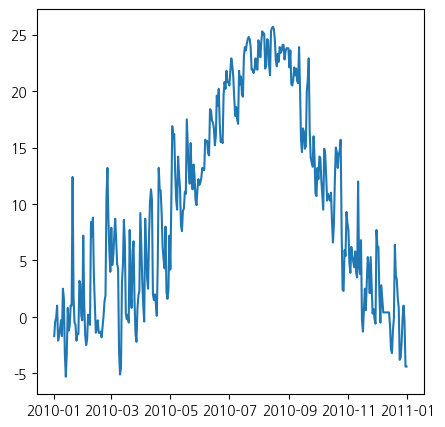

In [52]:
# 하나의 셀 안에 어떻게 출력할 것인지

plt.figure(figsize=(5, 5))
plt.plot(x, y1)
plt.show()

In [53]:
# 그래프 변수
x = weather_df.index # 시간순서

y1 = weather_df['최저기온(°C)']
y2 = weather_df['최고기온(°C)']
y3 = weather_df['일강수량(mm)']
y4 = weather_df['최대 순간 풍속(m/s)']
y5 = weather_df['평균 풍속(m/s)']
y6 = weather_df['최대 순간 풍속 풍향(hhmi)']

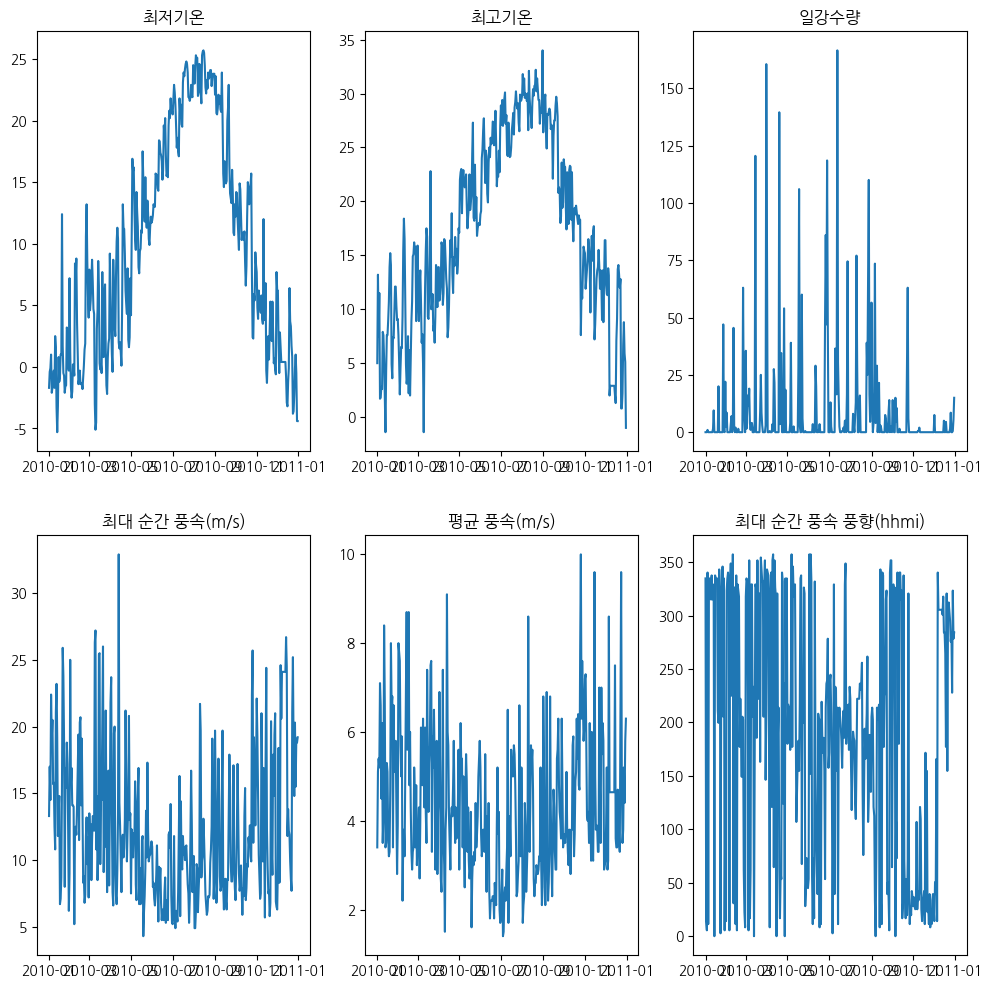

In [57]:
plt.figure(figsize=(12, 12)) # 그래프 사이즈

# subplots
# plt.subplot(행, 열, 인덱스)
plt.subplot(2, 3, 1)
plt.title('최저기온')
plt.plot(x, y1) # 그래프 그리기

plt.subplot(2, 3, 2)
plt.title('최고기온')
plt.plot(x, y2)

plt.subplot(2, 3, 3)
plt.title('일강수량')
plt.plot(x, y3)

plt.subplot(2, 3, 4)
plt.title('최대 순간 풍속(m/s)')
plt.plot(x, y4) # 그래프 그리기

plt.subplot(2, 3, 5)
plt.title('평균 풍속(m/s)')
plt.plot(x, y5)

plt.subplot(2, 3, 6)
plt.title('최대 순간 풍속 풍향(hhmi)')
plt.plot(x, y6)

plt.show() # 그래프 출력

In [58]:
weather_date = pd.Series(weather_df.index)
weather_date

0     2010-01-01
1     2010-01-02
2     2010-01-03
3     2010-01-04
4     2010-01-05
         ...    
360   2010-12-27
361   2010-12-28
362   2010-12-29
363   2010-12-30
364   2010-12-31
Name: 일시, Length: 365, dtype: datetime64[ns]

In [59]:
weather_df['월'] = weather_date.dt.month.values

In [60]:
weather_df

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi),월
일시,,,,,,,
2010-01-01,-1.7,5.0,0.0,13.3,3.4,334.7,1
2010-01-02,-0.4,13.2,0.0,17.0,5.1,14.1,1
2010-01-03,-0.1,7.5,0.0,14.5,5.4,5.5,1
2010-01-04,1.0,11.5,1.0,22.4,5.2,340.2,1
2010-01-05,-2.1,1.7,0.0,19.1,7.1,11.3,1
...,...,...,...,...,...,...,...
2010-12-27,-0.1,6.7,0.0,20.3,3.8,284.1,12
2010-12-28,1.0,8.8,0.0,15.5,5.2,227.8,12
2010-12-29,-0.5,5.9,0.5,19.1,4.4,323.3,12


In [68]:
month_1_low_temp = weather_df.groupby(weather_df['월'])['최저기온(°C)'].mean()

In [ ]:
weather_df.groupby(weather_df['월'])['최저기온(°C)'].mean()
weather_df.groupby(weather_df['월'])['최고기온(°C)'].mean()
weather_df.groupby(weather_df['월'])['일강수량(mm)'].mean()
weather_df.groupby(weather_df['월'])['최대 순간 풍속(m/s)'].mean()
weather_df.groupby(weather_df['월'])['평균 풍속(m/s)'].mean()
weather_df.groupby(weather_df['월'])['최대 순간 풍속 풍향(hhmi)'].mean()

In [89]:
month_low_temp = weather_df.groupby(weather_df['월'])['최저기온(°C)'].mean()

In [90]:
month_high_temp = weather_df.groupby(weather_df['월'])['최고기온(°C)'].mean()

In [91]:
month_daily_vol = weather_df.groupby(weather_df['월'])['일강수량(mm)'].mean()

In [92]:
month_wind_speed = weather_df.groupby(weather_df['월'])['최대 순간 풍속(m/s)'].mean()

In [93]:
month_wind_mean = weather_df.groupby(weather_df['월'])['평균 풍속(m/s)'].mean()

In [94]:
month_wind_dic = weather_df.groupby(weather_df['월'])['최대 순간 풍속 풍향(hhmi)'].mean()

In [95]:
# x_month = weather_df['월']
# x_month['']

x_month = weather_df['월'].unique()

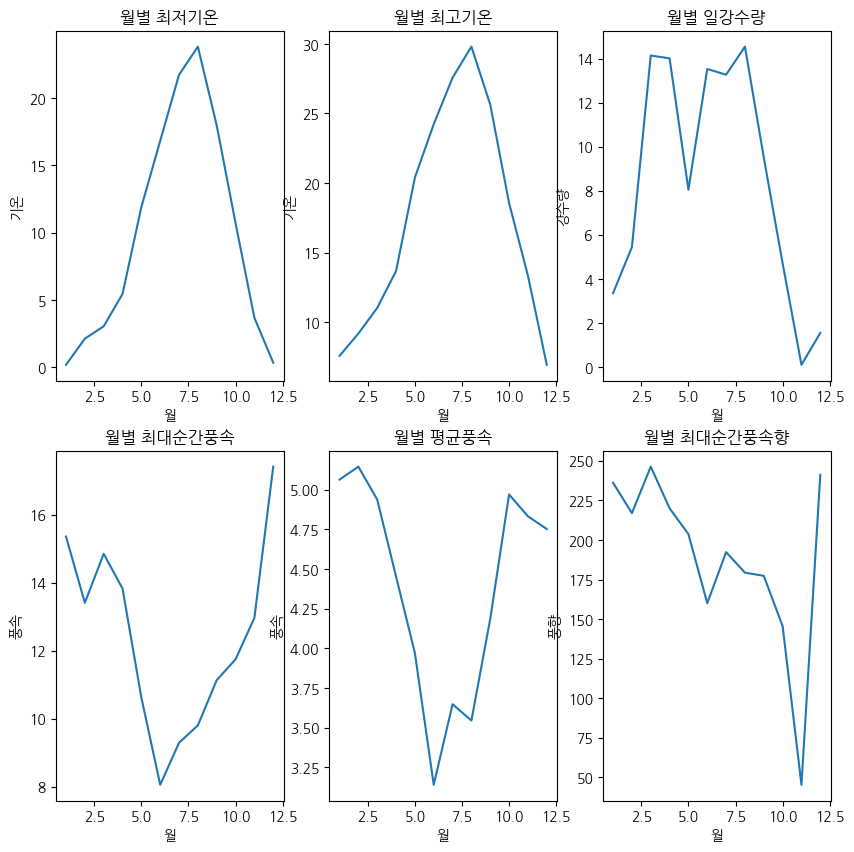

In [96]:
# 그룹바이 월별데이터 -> 1월 데이터들 -> 그래프
plt.figure(figsize=(10, 10))

# 1
plt.subplot(2, 3, 1)
plt.title('월별 최저기온')
plt.ylabel('기온')
plt.xlabel('월')
plt.plot(x_month, month_low_temp)

# 2
plt.subplot(2, 3, 2)
plt.title('월별 최고기온')
plt.ylabel('기온')
plt.xlabel('월')
plt.plot(x_month, month_high_temp)

# 3
plt.subplot(2, 3, 3)
plt.title('월별 일강수량')
plt.ylabel('강수량')
plt.xlabel('월')
plt.plot(x_month, month_daily_vol)

# 4
plt.subplot(2, 3, 4)
plt.title('월별 최대순간풍속')
plt.ylabel('풍속')
plt.xlabel('월')
plt.plot(x_month, month_wind_speed)

# 5
plt.subplot(2, 3, 5)
plt.title('월별 평균풍속')
plt.ylabel('풍속')
plt.xlabel('월')
plt.plot(x_month, month_wind_mean)

# 6
plt.subplot(2, 3, 6)
plt.title('월별 최대순간풍속향')
plt.ylabel('풍향')
plt.xlabel('월')
plt.plot(x_month, month_wind_dic)

plt.show()

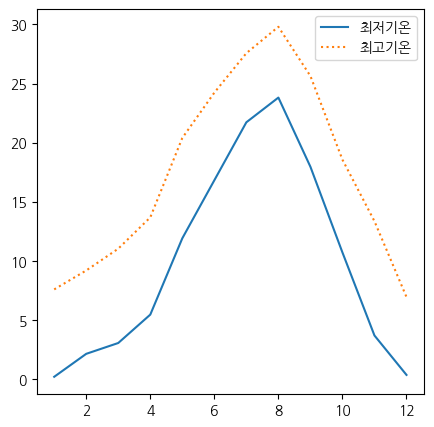

In [97]:
# 기온 그래프를 하나의 그래프로 표시

plt.figure(figsize=(5, 5))

plt.plot(x_month, month_low_temp, label='최저기온')
plt.plot(x_month, month_high_temp, ':', label='최고기온')
plt.legend(loc='upper right')
# 색상: b: blue, r: red, y: yellow, w: white ... 
# 선: --: dash line, -.: dash dot, : - dot ... # 링크 남기기
# 범례 위치: upper left, uppter center, center(left, right), lower(left, right)

plt.show()

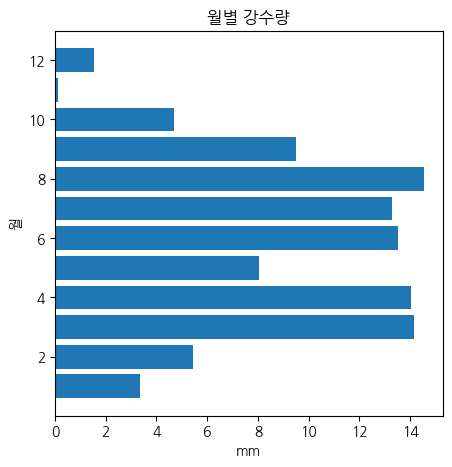

In [103]:
plt.figure(figsize=(5, 5))
plt.title('월별 강수량')
plt.xlabel('mm')
plt.ylabel('월')

plt.barh(x_month, month_daily_vol)

plt.show()

In [104]:
month_1 = weather_df[weather_df['월']==1]

In [105]:
month_1

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi),월
일시,,,,,,,
2010-01-01,-1.7,5.0,0.0,13.3,3.4,334.7,1
2010-01-02,-0.4,13.2,0.0,17.0,5.1,14.1,1
2010-01-03,-0.1,7.5,0.0,14.5,5.4,5.5,1
2010-01-04,1.0,11.5,1.0,22.4,5.2,340.2,1
2010-01-05,-2.1,1.7,0.0,19.1,7.1,11.3,1
2010-01-06,-1.7,1.8,0.0,20.5,6.6,326.2,1
2010-01-07,-1.1,2.8,0.0,15.7,4.5,334.7,1
2010-01-08,-0.3,2.6,0.0,15.8,6.2,320.6,1
2010-01-09,-1.7,7.9,0.0,12.5,3.5,315.0,1


In [106]:
month_1.head()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi),월
일시,,,,,,,
2010-01-01,-1.7,5.0,0.0,13.3,3.4,334.7,1
2010-01-02,-0.4,13.2,0.0,17.0,5.1,14.1,1
2010-01-03,-0.1,7.5,0.0,14.5,5.4,5.5,1
2010-01-04,1.0,11.5,1.0,22.4,5.2,340.2,1
2010-01-05,-2.1,1.7,0.0,19.1,7.1,11.3,1


In [107]:
month_1.tail()

,최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),최대 순간 풍속 풍향(hhmi),월
일시,,,,,,,
2010-01-27,3.2,12.1,47.0,18.8,5.3,205.3,1
2010-01-28,2.9,12.1,0.5,17.2,5.8,334.7,1
2010-01-29,0.1,10.3,0.0,12.2,4.4,5.5,1
2010-01-30,-0.3,9.0,22.0,6.2,2.8,135.0,1
2010-01-31,7.2,9.1,2.5,9.0,3.9,14.1,1


In [ ]:
plt.plot(month_1['최저기온(°C)'])
plt.plot(month_1['최저기온(°C)'])

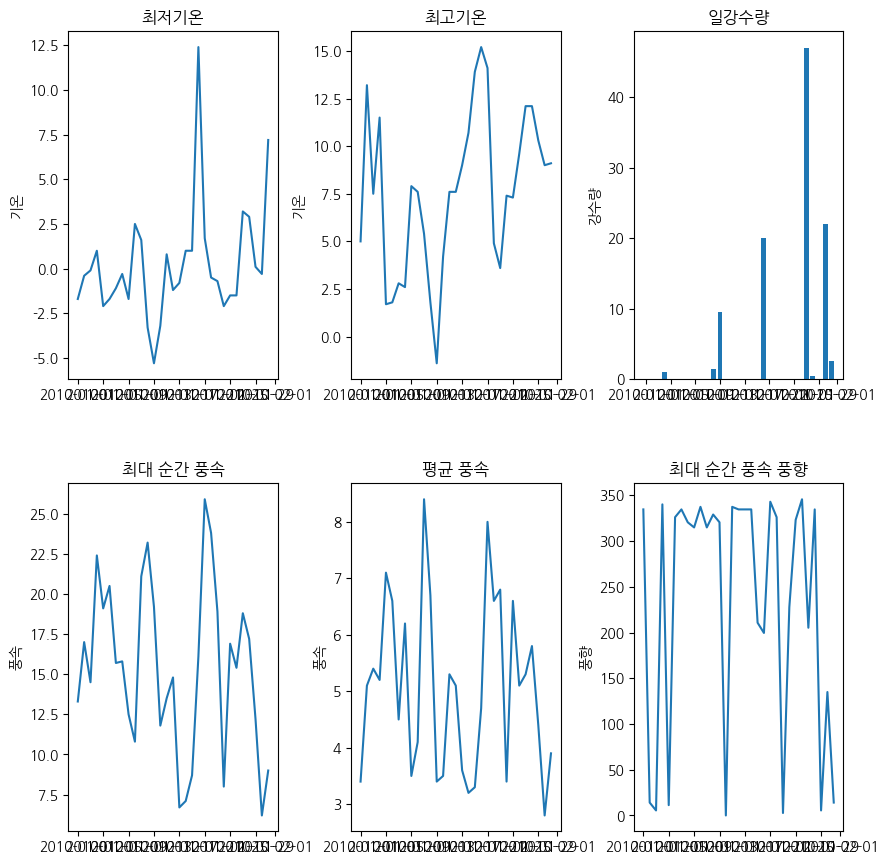

In [110]:
# 1월 데이터를 subplot 이용해서 2x3 으로 그려주세요. -> 강수량은 BAR 그래프로
plt.figure(figsize=(10, 10))

# subplots 간의 간격 조절
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.35, hspace=0.3)

# 1
plt.subplot(2, 3, 1)
plt.title('최저기온')
plt.ylabel('기온')
plt.plot(month_1['최저기온(°C)'])

# 2
plt.subplot(2, 3, 2)
plt.title('최고기온')
plt.ylabel('기온')
plt.plot(month_1['최고기온(°C)'])

# 3
plt.subplot(2, 3, 3)
plt.title('일강수량')
plt.ylabel('강수량')
plt.bar(month_1.index, month_1['일강수량(mm)']) # bar 그래프는 x, y 를 입력해야함

# 4
plt.subplot(2, 3, 4)
plt.title('최대 순간 풍속')
plt.ylabel('풍속')
plt.plot(month_1['최대 순간 풍속(m/s)'])

# 5
plt.subplot(2, 3, 5)
plt.title('평균 풍속')
plt.ylabel('풍속')
plt.plot(month_1['평균 풍속(m/s)'])

# 6
plt.subplot(2, 3, 6)
plt.title('최대 순간 풍속 풍향')
plt.ylabel('풍향')
plt.plot(month_1['최대 순간 풍속 풍향(hhmi)'])


plt.show()

In [122]:
food = pd.read_excel('jeju_food.xlsx')

In [124]:
food.head()

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,우진해장국,제주특별자치도,제주시,제주 제주시 서사로 11-0,음식,한식,108360
1,2,오는정김밥,제주특별자치도,서귀포시,제주 서귀포시 동문동로 2-0,음식,간이음식,71762
2,3,카페노티드제주,제주특별자치도,제주시,제주 제주시 애월로1길 24-9,음식,카페/찻집,70229
3,4,자매국수본점,제주특별자치도,제주시,제주 제주시 탑동로11길 6-0,음식,한식,66310
4,5,원앤온리,제주특별자치도,서귀포시,제주 서귀포시 산방로 141-0,음식,카페/찻집,61219


In [125]:
food.tail()

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
495,496,아라파파,제주특별자치도,제주시,제주 제주시 북촌15길 60-0,음식,간이음식,3559
496,497,애월연어,제주특별자치도,제주시,제주 제주시 하소로 660-0,음식,전문음식,3556
497,498,춘미향식당,제주특별자치도,서귀포시,제주 서귀포시 산방로 378-0,음식,한식,3552
498,499,서울앵무새제주점,제주특별자치도,서귀포시,제주 서귀포시 색달중앙로 162-0,음식,카페/찻집,3551
499,500,오후새우시,제주특별자치도,서귀포시,제주 서귀포시 천제연로 184-0,음식,한식,3542


In [126]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   순위        500 non-null    int64 
 1   관광지명      500 non-null    object
 2   광역시/도     500 non-null    object
 3   시/군/구     500 non-null    object
 4   도로명주소     500 non-null    object
 5   중분류 카테고리  500 non-null    object
 6   소분류 카테고리  500 non-null    object
 7   검색건수      500 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [127]:
food.describe()

,순위,검색건수
count,500.000000,500.000000
mean,250.468000,8898.482000
std,144.454807,9624.024732
min,1.000000,3542.000000
25%,125.750000,4340.750000
50%,250.500000,5694.500000
75%,375.250000,9107.250000
max,500.000000,108360.000000


In [128]:
food.isna().sum()

순위          0
관광지명        0
광역시/도       0
시/군/구       0
도로명주소       0
중분류 카테고리    0
소분류 카테고리    0
검색건수        0
dtype: int64

In [130]:
food = food.drop('광역시/도',axis=1)
food

,순위,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,우진해장국,제주시,제주 제주시 서사로 11-0,음식,한식,108360
1,2,오는정김밥,서귀포시,제주 서귀포시 동문동로 2-0,음식,간이음식,71762
2,3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,음식,카페/찻집,70229
3,4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,음식,한식,66310
4,5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,음식,카페/찻집,61219
...,...,...,...,...,...,...,...
495,496,아라파파,제주시,제주 제주시 북촌15길 60-0,음식,간이음식,3559
496,497,애월연어,제주시,제주 제주시 하소로 660-0,음식,전문음식,3556
497,498,춘미향식당,서귀포시,제주 서귀포시 산방로 378-0,음식,한식,3552
498,499,서울앵무새제주점,서귀포시,제주 서귀포시 색달중앙로 162-0,음식,카페/찻집,3551


In [131]:
food['중분류 카테고리'].unique()

array(['음식'], dtype=object)

In [132]:
food = food.drop('중분류 카테고리', axis=1)
food

,순위,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
0,1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
1,2,오는정김밥,서귀포시,제주 서귀포시 동문동로 2-0,간이음식,71762
2,3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,카페/찻집,70229
3,4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
4,5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,카페/찻집,61219
...,...,...,...,...,...,...
495,496,아라파파,제주시,제주 제주시 북촌15길 60-0,간이음식,3559
496,497,애월연어,제주시,제주 제주시 하소로 660-0,전문음식,3556
497,498,춘미향식당,서귀포시,제주 서귀포시 산방로 378-0,한식,3552
498,499,서울앵무새제주점,서귀포시,제주 서귀포시 색달중앙로 162-0,카페/찻집,3551


In [133]:
food['소분류 카테고리'].value_counts()

한식       210
카페/찻집    152
전문음식      74
간이음식      49
외국식       12
음식점기타      3
Name: 소분류 카테고리, dtype: int64

In [134]:
food = food.set_index('순위')

In [136]:
food

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
2,오는정김밥,서귀포시,제주 서귀포시 동문동로 2-0,간이음식,71762
3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,카페/찻집,70229
4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,카페/찻집,61219
...,...,...,...,...,...
496,아라파파,제주시,제주 제주시 북촌15길 60-0,간이음식,3559
497,애월연어,제주시,제주 제주시 하소로 660-0,전문음식,3556
498,춘미향식당,서귀포시,제주 서귀포시 산방로 378-0,한식,3552


In [139]:
food[food['소분류 카테고리'] == '한식'][0:9]

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
8,숙성도중문점,서귀포시,제주 서귀포시 일주서로 966-0,한식,44021
11,숙성도노형본관,제주시,제주 제주시 원노형로 41-0,한식,38023
12,고집돌우럭중문점,서귀포시,제주 서귀포시 일주서로 879-0,한식,33827
...,...,...,...,...,...
488,목포고을,서귀포시,제주 서귀포시 일주서로 968-5,한식,3602
493,삼일식당[한식],제주시,제주 제주시 한림상로 92-0,한식,3568
495,풍로,서귀포시,제주 서귀포시 신화역사로 423-0,한식,3564


In [141]:
food[food['소분류 카테고리'] == '카페/찻집']

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
3,카페노티드제주,제주시,제주 제주시 애월로1길 24-9,카페/찻집,70229
5,원앤온리,서귀포시,제주 서귀포시 산방로 141-0,카페/찻집,61219
6,더클리프,서귀포시,제주 서귀포시 중문관광로 154-17,카페/찻집,51031
9,블루보틀제주,제주시,제주 제주시 번영로 2133-30,카페/찻집,42252
13,스타벅스제주서해안로DT점,제주시,제주 제주시 서해안로 624-0,카페/찻집,31720
...,...,...,...,...,...
468,당당,제주시,제주 제주시 중엄안1길 25-0,카페/찻집,3703
483,집의기록상점카페,제주시,제주 제주시 귀덕11길 60-0,카페/찻집,3616
484,와토커피,서귀포시,제주 서귀포시 상모대서로 23-0,카페/찻집,3611


In [144]:
food[food['소분류 카테고리'] == '한식'].head(10)

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
1,우진해장국,제주시,제주 제주시 서사로 11-0,한식,108360
4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
8,숙성도중문점,서귀포시,제주 서귀포시 일주서로 966-0,한식,44021
11,숙성도노형본관,제주시,제주 제주시 원노형로 41-0,한식,38023
12,고집돌우럭중문점,서귀포시,제주 서귀포시 일주서로 879-0,한식,33827
17,춘심이네본점,서귀포시,제주 서귀포시 창천중앙로24번길 16-0,한식,28601
18,올래국수,제주시,제주 제주시 귀아랑길 24-0,한식,28260
29,중문수두리보말칼국수,서귀포시,제주 서귀포시 천제연로 192-0,한식,22680
30,늘봄흑돼지,제주시,제주 제주시 한라대학로 12-0,한식,22520


In [146]:
food[food['관광지명'].str.contains('스타벅스')]

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
13,스타벅스제주서해안로DT점,제주시,제주 제주시 서해안로 624-0,카페/찻집,31720
14,스타벅스제주애월DT점,제주시,제주 제주시 애월해안로 376-0,카페/찻집,30588
16,스타벅스제주성산DT점,서귀포시,제주 서귀포시 일출로 80-0,카페/찻집,28622
19,스타벅스제주용담DT점,제주시,제주 제주시 서해안로 380-0,카페/찻집,27201
20,스타벅스제주중문DT점,서귀포시,제주 서귀포시 천제연로 95-0,카페/찻집,26813
35,스타벅스제주중문점,서귀포시,제주 서귀포시 중문관광로110번길 32-0,카페/찻집,21005
40,스타벅스서귀포DT점,서귀포시,제주 서귀포시 일주서로 11-0,카페/찻집,20341
51,스타벅스제주함덕점,제주시,제주 제주시 조함해안로 522-0,카페/찻집,16506
72,스타벅스제주협재점,제주시,제주 제주시 한림로 337-0,카페/찻집,13737


In [148]:
noodle = food[food['소분류 카테고리'] == '한식']
noodle[noodle['관광지명'].str.contains('국수')]

,관광지명,시/군/구,도로명주소,소분류 카테고리,검색건수
순위,,,,,
4,자매국수본점,제주시,제주 제주시 탑동로11길 6-0,한식,66310
18,올래국수,제주시,제주 제주시 귀아랑길 24-0,한식,28260
29,중문수두리보말칼국수,서귀포시,제주 서귀포시 천제연로 192-0,한식,22680
34,가시아방국수,서귀포시,제주 서귀포시 섭지코지로 10-0,한식,21554
68,국수바다본점,서귀포시,제주 서귀포시 일주서로 982-0,한식,14324
82,제주순메밀막국수,서귀포시,제주 서귀포시 녹차분재로 60-0,한식,12713
83,한림칼국수,제주시,제주 제주시 한림해안로 141-0,한식,12656
100,하갈비국수,제주시,제주 제주시 애월북서길 52-0,한식,10224
112,삼대국수회관본점,제주시,제주 제주시 삼성로 41-0,한식,9711


In [153]:
pie = food['소분류 카테고리'].value_counts()
pie.values

array([210, 152,  74,  49,  12,   3])

In [154]:
pie_p = [pie.values[0]]

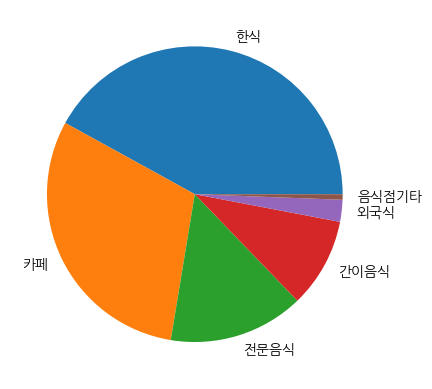

In [156]:

label = ['한식', '카페', '전문음식', '간이음식', '외국식', '음식점기타']
plt.pie(pie.values, labels=label)
plt.show()